# Using NBA player of the week data. 

Use scripting methods to transform and analyze the NBA Player of the week data taken from Kaggle. <br>
The objective is to use concise and repeatable scripting methods to transform the dataset into something <br>
that be used for graphing and analysis. 

Demonstrate the steps discussed in class <br>
and produce a result that can be run, in a single pass, that will support analysis. 

From the Kaggle site the data is presented in a way that requires the analyst/programmer to transform the data prior to use. <br>

One obvious example of this is: <br>
Height and weight are in mixed formats. (ft-in/cm) (lb/kg) <br>

In addition to the questions presented in the Kaggle Walkthrough article <br>
Analysis questions were created and an attempt was made to discover the answers <br>


## Track through the Kaggle Walkthrough and create facts related to the Data. 

How has the bio statistics of NBA players changed over the years? <br>
Can we use the historical data to predict the player position based on bio statistics?
















### Transformation and Feature Extraction
Bucketing - Combining similar values to make the data more relatable
Normalization - converting the values of a column into a ‘normalized’ range.

### Pick an Algorithm
Cross Validation
Tuning and Predictions


In [1]:
#https://www.kaggle.com/jacobbaruch/nba-player-of-the-week

import pandas as pd
import numpy as np
import csv 
from matplotlib import pyplot as plot
import seaborn as sns
import matplotlib
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import  confusion_matrix
import matplotlib.pyplot as plt
import itertools

# split first middle last
#split team neame
#split date 
#remove column

In [2]:
bbfile = '/Users/kenmckee/Desktop/GS/F18/Scrpt/KMCKEE_HW1/NBA_player_of_the_week.csv'

#### How many records (rows) have been provided?

In [3]:
#You may choose a dataset to work with.  
#As a guideline, datasets should be chosen that have somewhere between 500 and 4,000 lines of data 
#with some number of columns between 4 and 50.  
#These guidelines are not exact limits, just guidance for selecting data.


bbdf = pd.read_csv(bbfile)

#print(bbdf)
bbdf.shape

(1145, 13)



### Kaggle Part two suggests we should check the following. 

So far we know.
What features (columns) does the dataset contain?
NBA Player of the Week Records 1988 to 2018

How many records (rows) have been provided?
1145X13 Matrix

We will look at the dataset further to find the following. 

What format is the data in (e.g. what format are the dates provided, are there numerical values, what do the different categorical values look like)?

Are there missing values?

How do the different features relate to each other?

## Understand Data
#### A list of all "player of the week" recipients from 1985 to 2018.

#### What features (columns) does the dataset contain? 


In [4]:
#bbdf.Conference.unique()

bbdf.isnull().sum()



Age                    0
Conference           384
Date                   0
Draft Year             0
Height                 0
Player                 0
Position               0
Season                 0
Season short           0
Seasons in league      0
Team                   0
Weight                 0
Real_value             0
dtype: int64

### How many different players are there

### 384 of 1145 observations are Null in the conference column ..
#### We will take a look and decide what the problem is 

In [5]:
bbdf.Player.unique()

array(['Micheal Ray Richardson', 'Derek Smith', 'Calvin Natt',
       'Kareem Abdul-Jabbar', 'Larry Bird', 'Darrell Griffith',
       'Sleepy Floyd', 'Mark Aguirre', 'Magic Johnson',
       'Dominique Wilkins', 'Tom McMillen', 'Michael Jordan',
       'World B. Free', 'Isiah Thomas', 'Terry Cummings',
       'Orlando Woolridge', 'Jack Sikma', 'Bernard King', 'Moses Malone',
       'Alex English', 'Larry Nance', 'Herb Williams', 'Charles Barkley',
       'Adrian Dantley', 'Sidney Moncrief', 'Clyde Drexler',
       'Alvin Robertson', 'Jeff Ruland', 'Patrick Ewing', 'Buck Williams',
       'Julius Erving', 'Larry Smith', 'Karl Malone', 'Fat Lever',
       'Otis Thorpe', 'Tom Chambers', 'Hot Rod Williams', 'Robert Parish',
       'Harold Pressley', 'Bobby Hansen', 'Roy Tarpley', 'John Stockton',
       'Byron Scott', 'Xavier McDaniel', 'Kevin Johnson', 'Chuck Person',
       'Hakeem Olajuwon', 'Ron Harper', 'Chris Mullin', 'Dale Ellis',
       'Michael Adams', 'David Robinson', 'Rony Seika

#### This format is probably ok for what the objective is but we should split the column all the same
We will add that to the list for reshaping and reforming the data. 

In [6]:
pu = bbdf.Player.unique()
print(len(pu))

print(1145/274)

274
4.178832116788321


#### 1145 records with 274 Unique player names. (that's averages out to four records per player)
First we will check for nulls and decide what to do with the other column formats

In [7]:
print(bbdf)

      Age Conference          Date  Draft Year Height                  Player  \
0      29        NaN  Apr 14, 1985        1978    6-5  Micheal Ray Richardson   
1      23        NaN   Apr 7, 1985        1982    6-6             Derek Smith   
2      28        NaN   Apr 1, 1985        1979    6-6             Calvin Natt   
3      37        NaN  Mar 24, 1985        1969    7-2     Kareem Abdul-Jabbar   
4      28        NaN  Mar 17, 1985        1978    6-9              Larry Bird   
5      26        NaN  Mar 10, 1985        1980    6-4        Darrell Griffith   
6      24        NaN   Mar 3, 1985        1982    6-3            Sleepy Floyd   
7      25        NaN  Feb 24, 1985        1981    6-6            Mark Aguirre   
8      25        NaN  Feb 17, 1985        1979    6-9           Magic Johnson   
9      25        NaN   Feb 3, 1985        1982    6-7       Dominique Wilkins   
10     32        NaN  Jan 27, 1985        1974   6-11            Tom McMillen   
11     22        NaN  Jan 20

### Kaggle Walkthrough Part Three Cleaning Data 
Article suggests we either fix or ignore the missing and misformatted datat <br>
The data needs to be put into a state that can be analyzed for bio metrics <br>
If we can fix the data we will. 

We are going to assume that, in the future, name and team will need to be used in analysis <br>


### This is a list of tasks for fixing the data
Split first and last name  - use  a string split on the first space to the left from the end <br>
Split city and team name - same process <br>
Fill in Conference values - Did a little research and found the correct conference per year and filled <br>
the data in for the given team name. 

### The important ones.
Height was partially in feet-inches and partially in centimeters. F-I and XXcm <br>
Weight was in pounds and kilograms XXX and XXkg

#### Method
split off the numeric from the alpha <br>
for F-I height split feet from inches on the dash and create F and I columns


### use str.split to divide the string on the first space from the right.
assign the two separate strings to new columns. <br>

bbdf['Last-Name'] = bbdf['Player'].str.rsplit(' ',1).str[1]

In [8]:
bbdf['Last-Name'] = bbdf['Player'].str.rsplit(' ',1).str[1]
bbdf['First-Name'] = bbdf['Player'].str.rsplit(' ',1).str[0]




### Show the frequency of Player Last Name in the Dataset

In [9]:

pcounts = bbdf['Last-Name'].value_counts()



print(pcounts[:5])

James      62
Bryant     33
Johnson    28
Malone     26
Durant     26
Name: Last-Name, dtype: int64


### Split Team name and City
Rename Season Short to SSeason

In [10]:
#s.rsplit(";", 3)

bbdf['TeamName'] = bbdf['Team'].str.rsplit(' ',1).str[1]
bbdf['City'] = bbdf['Team'].str.rsplit(' ',1).str[0]
bbdf = bbdf.drop(['Season'],axis=1)
bbdf['SSeason'] = bbdf['Season short']
bbdf = bbdf.drop(['Season short'],axis=1)


#### What is the frequency of the top ten team names in the dataset?

.value_counts() will summarize the dataframe based on column in this case

In [11]:
#find the team with the most players in the population

from matplotlib import pyplot as plot
import numpy as np
pcounts = bbdf['TeamName'].value_counts()



print(pcounts[:10])



Lakers       71
Spurs        61
Cavaliers    59
Heat         57
Rockets      56
Jazz         47
Suns         45
Warriors     44
Magic        44
Bulls        44
Name: TeamName, dtype: int64


#### Find Null Conference observations

#### Create a list of unique Team names  where the conference is missing

In [12]:
bbdfn = bbdf[bbdf['Conference'].isnull()]
bbdfnt = bbdfn.TeamName.unique()

print(bbdfnt)

#for t in bbdfnt:
#    c = bbdf.loc[bbdf['TeamName'] == t, 'Conference']
#    print(t,c)
    


['Nets' 'Clippers' 'Nuggets' 'Lakers' 'Celtics' 'Jazz' 'Warriors'
 'Mavericks' 'Hawks' 'Bullets' 'Bulls' 'Cavaliers' 'Pistons' 'Bucks'
 'SuperSonics' 'Knicks' 'Sixers' 'Suns' 'Pacers' 'Blazers' 'Spurs' 'Kings'
 'Rockets' 'Heat' 'Magic' 'Hornets' 'Timberwolves' 'Raptors']


#### The Null in Conference is illustrated here

In [13]:
print(bbdfn.loc[[379]])

     Age Conference          Date  Draft Year Height       Player Position  \
379   21        NaN  Nov 26, 2000        1999    6-3  Baron Davis        G   

     Seasons in league               Team Weight  Real_value Last-Name  \
379                  1  Charlotte Hornets    215         1.0     Davis   

    First-Name TeamName       City  SSeason  
379      Baron  Hornets  Charlotte     2001  


#### Create our lists for the desired conference

In [14]:
west = bbdf['TeamName'][bbdf['Conference']=='West']
east = bbdf['TeamName'][bbdf['Conference']=='East']
#east = list(bbdf.loc[bbdf['Conference'] == 'East'])

print(west.unique())
print(east.unique())
#print(east)

['Spurs' 'Suns' 'Lakers' 'Blazers' 'Jazz' 'Mavericks' 'Timberwolves'
 'Kings' 'SuperSonics' 'Clippers' 'Rockets' 'Nuggets' 'Warriors'
 'Grizzlies' 'Hornets' 'Thunder' 'Pelicans']
['Celtics' 'Pistons' 'Nets' 'Magic' 'Knicks' 'Sixers' 'Cavaliers' 'Bucks'
 'Heat' 'Pacers' 'Wizards' 'Hawks' 'Raptors' 'Hornets' 'Bulls' 'Bobcats'
 'Clippers']


In [15]:
WEST = ('Clippers','Nuggets','Lakers','Jazz','Warriors','Mavericks','Supersonics','Suns','Blazers','Spurs','Kings','Rockets','Timberwolves',)
EAST = ('Nets','Celtics','Hawks','Bullets','Bulls','Cavaliers','Pistions','Bucks','Knicks','Sixers','Pacers','Heat','Magic','Raptors', 'Hornets')

#### Use the where is in function to assign conference names in the dataset
#### One for East and one for West. 

In [16]:
bbdf['Conference'] = np.where(bbdf.TeamName.isin(['Nets','Celtics','Hawks','Bullets','Bulls','Cavaliers','Pistions','Bucks','Knicks','Sixers','Pacers','Heat','Magic','Raptors', 'Hornets','Pistons']),'East', bbdf['Conference'])
#print(bbdf)


In [17]:
bbdf['Conference'] = np.where(bbdf.TeamName.isin(['Clippers','Nuggets','Lakers','Jazz','Warriors','Mavericks','SuperSonics','Suns','Blazers','Spurs','Kings','Rockets','Timberwolves']),'West', bbdf['Conference'])
#print(bbdf)

### Check for Nulls and it looks like it worked. 
bbdfn = bbdf[bbdf['Conference'].isnull()] 

If the function failed this would return a result greater than zero. 



In [18]:
bbdfn = bbdf[bbdf['Conference'].isnull()]
bbdfnt = bbdfn.TeamName.unique()

print(bbdfnt)

for t in bbdfnt:
    c = bbdf.loc[bbdf['TeamName'] == t, 'Conference']
    print(t,c)

[]


### Work on the Height Column. 

Split CM from the string usint str.split
move the numeric to a new Inches column and create a marker called htype when cm is encountered. 

We will use this later to decide how to convert all the data to feet and inches. 

The observations that are F-I are then split on the dash using str.split where htype is null
Create a feet column and populate Feet with F and I with Inches 

isnull and notnull was the function that was used to distinguish the different height and weight values <br>
if the operation was executed on the row a marker was added and, if not, the field was left null <br>
in this was it was possible to keep track of which records were different <br>

There are many ways to do this and this one is probably not the most effiecient. <br>
The process does a very clear job of demonstrating how text.split can be used to transform data. 

When using expand=True, the split elements will expand out into separate columns



In [19]:
bbdf['inches'] = 0
bbdf[['inches','htype']] = bbdf['Height'].str.split('cm', expand=True)
#print(bbdf['htype'])


#### It probably wasn't necessary to initialize 'feet' but it never hurts. 

When htype is null (feet and inches) split 'Height' on the dash and assign the F portion to a column called 'feet' <br>
and set the right side to inches <br>

This is an interesting format for running this process

In [20]:
bbdf['feet'] = 0
bbdf.feet[bbdf['htype'].isnull()] , bbdf.inches[bbdf['htype'].isnull()] = bbdf['Height'].str.split('-', 1).str


#print(bbdf['inches'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Now apply the math to obtain the total inches for each record

Combine feet and inches for total inches
Where CM is flagged - multiply inches by .393701

The process demonstrates mathmatical transformation. <br>
Create a column called nheight (new height) so we can verify the result against the <br>
provided data.



In [21]:

bbdf['inches'] = (bbdf['feet'].astype(int) * 12) + (bbdf['inches'].astype(int))

bbdf.inches[bbdf['htype'].notnull()] = (bbdf['inches'].astype(float)*0.393701)


#print(bbdf['feet'], bbdf['htype'])
#print(bbdf['feet'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Divide inches by 12 and populate new height

In [22]:
bbdf['nheight'] = bbdf['inches'].astype(float)/12
bbdf['nheight'] = bbdf.nheight.round(2)

#print(bbdf['nheight'])

### Compare the two columns.

The Zip function can combine two lists for convenience.

This is a very light example of normalization
using base 10 for height instead of base 12

In [23]:
hcomp = bbdf['Height']
hcompn = bbdf['nheight']

for h, nh in zip(hcomp, hcompn):
    print(h,nh)

6-5 6.42
6-6 6.5
6-6 6.5
7-2 7.17
6-9 6.75
6-4 6.33
6-3 6.25
6-6 6.5
6-9 6.75
6-7 6.58
6-11 6.92
6-6 6.5
6-2 6.17
6-1 6.08
6-5 6.42
6-9 6.75
6-6 6.5
6-9 6.75
6-11 6.92
6-7 6.58
6-10 6.83
6-7 6.58
6-10 6.83
6-7 6.58
6-10 6.83
6-6 6.5
6-5 6.42
6-9 6.75
6-9 6.75
6-6 6.5
6-3 6.25
6-9 6.75
6-7 6.58
6-6 6.5
6-9 6.75
6-6 6.5
6-7 6.58
6-7 6.58
6-10 6.83
6-3 6.25
6-10 6.83
6-9 6.75
6-7 6.58
7-0 7.0
6-8 6.67
6-6 6.5
6-6 6.5
6-6 6.5
6-9 6.75
6-8 6.67
6-9 6.75
6-9 6.75
6-9 6.75
6-6 6.5
6-10 6.83
6-9 6.75
6-3 6.25
6-7 6.58
6-9 6.75
6-1 6.08
6-9 6.75
7-0 7.0
6-9 6.75
6-7 6.58
6-10 6.83
6-11 6.92
6-3 6.25
7-0 7.0
6-6 6.5
6-9 6.75
6-3 6.25
6-7 6.58
6-6 6.5
6-6 6.5
6-6 6.5
6-7 6.58
6-6 6.5
6-11 6.92
6-1 6.08
6-7 6.58
6-7 6.58
6-6 6.5
6-7 6.58
6-3 6.25
6-9 6.75
6-7 6.58
6-10 6.83
6-9 6.75
6-7 6.58
6-7 6.58
6-7 6.58
6-9 6.75
6-7 6.58
6-9 6.75
6-7 6.58
6-6 6.5
6-6 6.5
6-1 6.08
6-1 6.08
6-8 6.67
7-0 7.0
7-0 7.0
6-6 6.5
6-10 6.83
6-7 6.58
6-6 6.5
6-7 6.58
6-9 6.75
6-7 6.58
7-0 7.0
5-10 5.83
6-9 6.75
7-0 7.0

Check the results of the activity
does the new height match the old height?

### Reassign the new height to Height
We might need inches for something so we will keep that column for now. 

In [24]:
bbdf['Height'] = bbdf['nheight']
bbdf = bbdf.drop(['nheight'],axis=1)
#bbdf = bbdf.drop(['htype'],axis=1)
#bbdf = bbdf.drop(['wtype'],axis=1)
#bbdf = bbdf.drop(['h'],axis=1)



### Convert the weight in a similar way. 

In [25]:
bbdf[['weight','wtype']] = bbdf['Weight'].str.split('kg', expand=True)
#print (bbdf)

bbdf.weight[bbdf['wtype'].notnull()] = (bbdf['weight'].astype(float)*2.20462)
bbdf['weight'] = bbdf['weight'].astype(int)

#print(bbdf['weight'])
bbdf['Weight'] = bbdf['weight']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### More Normalization:
### To a certain extent .. this could be called feature selection as well. 
### Combining Classes to fit the objective can be helpful. 
### Here we will go to the extreme for demonstration purposes
#### The distribution of the FC and the GF classes should be factored into the other classes


In [26]:
pcounts = bbdf['Position'].value_counts()
print(pcounts)

G      178
SG     164
C      158
PF     139
F      125
PG     120
SF     119
FC      83
GF      47
F-C      9
G-F      3
Name: Position, dtype: int64


### Some of the position values can be combined for analysis


In [27]:
d = {'F-C':'F','G-F':'G','GF':'G', 'FC': 'F'}
bbdf = bbdf.replace(d)
e = {'SG': 'G', 'PF': 'F','PG':'G','SF':'F','FC':'F','GF':'F'}
bbdf['PClass'] = bbdf['Position']
bbdf['PClass'] = bbdf['PClass'].str.strip().replace(e)

pxcounts = bbdf['Position'].value_counts()
pccounts = bbdf['PClass'].value_counts()




pcnames = list(pccounts.index)
pxnames = list(pxcounts.index)
print(pccounts)
#print(pcnames)
print(pxcounts)
#print(pxnames)

G    512
F    475
C    158
Name: PClass, dtype: int64
G     228
F     217
SG    164
C     158
PF    139
PG    120
SF    119
Name: Position, dtype: int64


### the null values are the htype and wtype to signify where we converted data

In [28]:
bbdf.isnull().sum()

Age                     0
Conference              0
Date                    0
Draft Year              0
Height                  0
Player                  0
Position                0
Seasons in league       0
Team                    0
Weight                  0
Real_value              0
Last-Name               0
First-Name              0
TeamName                0
City                    0
SSeason                 0
inches                  0
htype                1055
feet                    0
weight                  0
wtype                1055
PClass                  0
dtype: int64

In [29]:
print(bbdf[:5])

   Age Conference          Date  Draft Year  Height                  Player  \
0   29       East  Apr 14, 1985        1978    6.42  Micheal Ray Richardson   
1   23       West   Apr 7, 1985        1982    6.50             Derek Smith   
2   28       West   Apr 1, 1985        1979    6.50             Calvin Natt   
3   37       West  Mar 24, 1985        1969    7.17     Kareem Abdul-Jabbar   
4   28       East  Mar 17, 1985        1978    6.75              Larry Bird   

  Position  Seasons in league                  Team  Weight   ...    \
0       PG                  6       New Jersey Nets     189   ...     
1       SG                  2  Los Angeles Clippers     205   ...     
2        F                  5        Denver Nuggets     220   ...     
3        C                 15    Los Angeles Lakers     225   ...     
4       SF                  5        Boston Celtics     220   ...     

    First-Name  TeamName         City SSeason inches  htype  feet weight  \
0  Micheal Ray      Ne

In [30]:
bbdf.shape

(1145, 22)

## Check our Data Formats one more time
#### spaces in column headers and indexes can be dangerous

In [31]:
bbdf = bbdf.rename(index=str, columns={"Draft Year": "DYear", "Seasons in league": "SIL"})



In [32]:
bbdf.dtypes

Age             int64
Conference     object
Date           object
DYear           int64
Height        float64
Player         object
Position       object
SIL             int64
Team           object
Weight          int64
Real_value    float64
Last-Name      object
First-Name     object
TeamName       object
City           object
SSeason         int64
inches        float64
htype          object
feet           object
weight          int64
wtype          object
PClass         object
dtype: object

## Group the data by Player and Position so we can get some descriptive statistics
.first gives the first record for each given search item 


In [33]:
bbdfu = bbdf.groupby(['Player']).first()

#print(bbdfu)
bbdfug = bbdfu.groupby(['Position'])
#list(bbdfug)

bbdfugd = dict(tuple(bbdfu.groupby('Position')))
print(type(bbdfugd))
print(bbdfu['Position'].value_counts(),"\n")
print(bbdfu['PClass'].value_counts(),"\n")
print(bbdfu.shape)


<class 'dict'>
G     60
F     46
C     39
PF    35
SG    34
PG    33
SF    27
Name: Position, dtype: int64 

G    127
F    108
C     39
Name: PClass, dtype: int64 

(274, 21)


### Descriptive Statistics for 
### Weight, Age, Height and Draft Year


In [34]:
print("\nWeight\n")

print("min ", bbdfu['weight'].min())
print("max ", bbdfu['weight'].max())
print("median ",bbdfu['weight'].median())
print("mode ",bbdfu['weight'].mode())
print("stddev ", bbdfu['weight'].std())

print("\nAge\n")

print("min ", bbdfu['Age'].min())
print("max ", bbdfu['Age'].max())
print("median ",bbdfu['Age'].median())
print("mode ",bbdfu['Age'].mode())
print("stddev ", bbdfu['Age'].std())

print("\nHeight\n")



print("min ", bbdfu['Height'].min())
print("max ", bbdfu['Height'].max())
print("median ",bbdfu['Height'].median())
print("mode ",bbdfu['Height'].mode())
print("stddev ", bbdfu['Height'].std())

print("\nDraft Year\n")

print("min ", bbdfu['DYear'].min())
print("max ", bbdfu['DYear'].max())
print("median ",bbdfu['DYear'].median())
print("mode ",bbdfu['DYear'].mode())
print("stddev ", bbdfu['DYear'].std())


Weight

min  150
max  325
median  220.0
mode  0    220
dtype: int64
stddev  29.409890047000665

Age

min  19
max  37
median  25.0
mode  0    25
dtype: int64
stddev  3.0655542823781463

Height

min  5.75
max  7.5
median  6.58
mode  0    6.58
dtype: float64
stddev  0.31376920010234105

Draft Year

min  1969
max  2016
median  1996.5
mode  0    1996
dtype: int64
stddev  10.57175474281778


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1024aedd8>]],
      dtype=object)

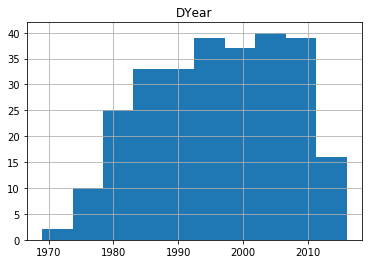

In [35]:
bbdfu.hist(column='DYear')

In [36]:
bbdfu.loc[bbdfu['DYear'] == 1969]



,Age,Conference,Date,DYear,Height,Position,SIL,Team,Weight,Real_value,...,First-Name,TeamName,City,SSeason,inches,htype,feet,weight,wtype,PClass
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,37,West,"Mar 24, 1985",1969,7.17,C,15,Los Angeles Lakers,225,1.0,...,Kareem,Lakers,Los Angeles,1985,86.0,None,7,225,None,C


In [37]:
bbdfu.loc[bbdfu['Weight']== 325]

,Age,Conference,Date,DYear,Height,Position,SIL,Team,Weight,Real_value,...,First-Name,TeamName,City,SSeason,inches,htype,feet,weight,wtype,PClass
Player,,,,,,,,,,,,,,,,,,,,,
Shaquille O'Neal,20,East,"Nov 15, 1992",1992,7.08,C,0,Orlando Magic,325,1.0,...,Shaquille,Magic,Orlando,1993,85.0,None,7,325,None,C


In [38]:


#ygroup = bbdf.groupby(['Season short', 'Position']).transform(np.mean)
pgroup = bbdf.groupby('Player').first()

#print(pgroup)
#list(pgroup)



## The regression line suggests that NBA player weight is going up <b> 
    (about five pounds in 50 years)

### and the height is steady
### https://seaborn.pydata.org/generated/seaborn.regplot.html

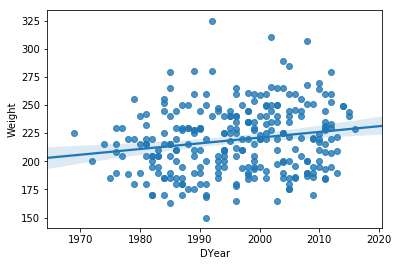

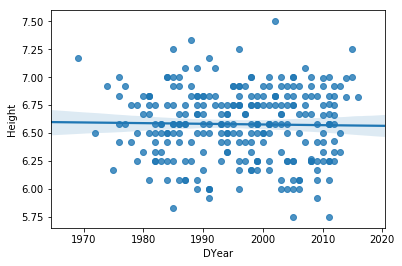

In [39]:
sns.regplot( x="DYear", y="Weight", data=pgroup)
plot.show()
sns.regplot( x="DYear", y="Height", data=pgroup)





### What does it look like when we separate by Position

## Highlight Position to look at the progress of weight and height through the years 

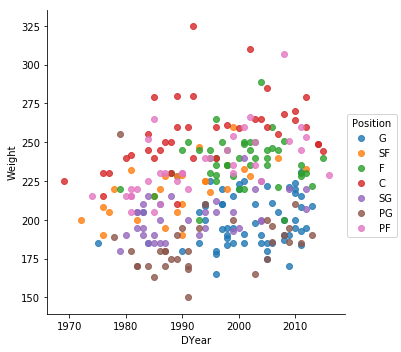

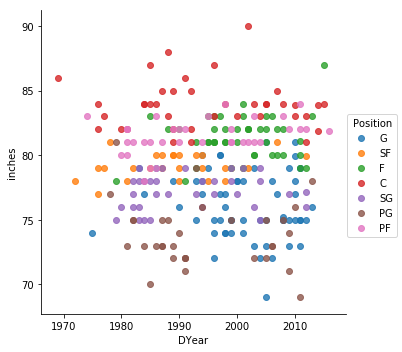

In [40]:
# library & dataset

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="DYear", y="Weight", data=pgroup, fit_reg=False, hue='Position')



# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="DYear", y="inches", data=pgroup, fit_reg=False, hue='Position')
 



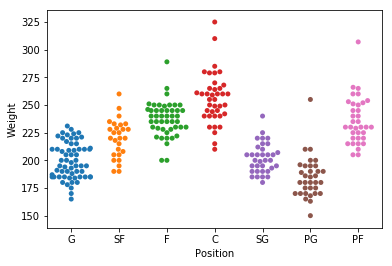

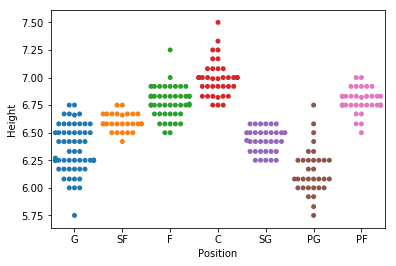

In [41]:
cols = ['Weight','Height','PClass']
# Basic correlogram
sns.swarmplot(x=pgroup['Position'], y=pgroup['Weight'])
plt.show()
sns.swarmplot(x=pgroup['Position'], y=pgroup['Height'])


### Use PClass to dial in some clarity

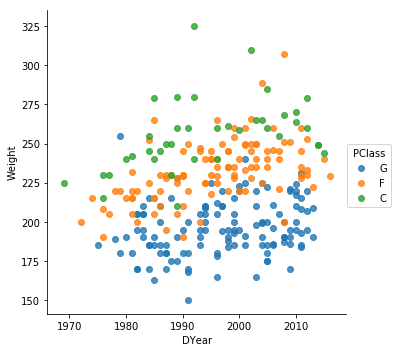

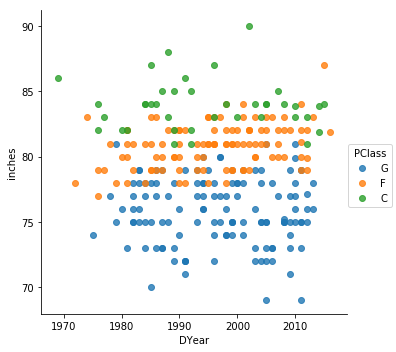

In [42]:
# library & dataset

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="DYear", y="Weight", data=pgroup, fit_reg=False, hue='PClass')



# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="DYear", y="inches", data=pgroup, fit_reg=False, hue='PClass')
 



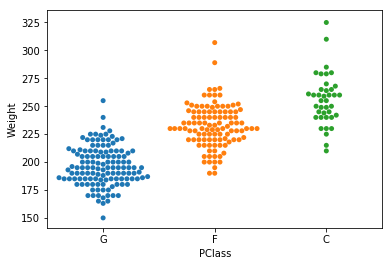

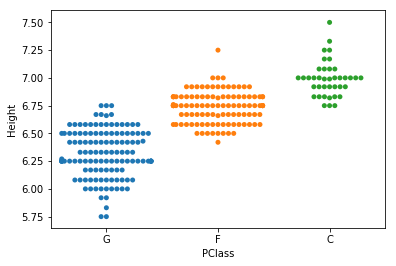

In [43]:
cols = ['Weight','Height','PClass']
# Basic correlogram
sns.swarmplot(x=pgroup['PClass'], y=pgroup['Weight'])
plt.show()
sns.swarmplot(x=pgroup['PClass'], y=pgroup['Height'])



In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(pgroup, test_size=0.4)

### Use Height and Weight to predict Position/PClass

In [45]:


# Instantiate the classifier
gnbp = GaussianNB()
gnbpc = GaussianNB()
used_features =[
    "Weight",
    "Height",
    "DYear",
]

### Build a model for Position and PClass using GaussianNB

In [46]:
gnbp.fit(
    X_train[used_features].values,
    X_train["Position"]
)


gnbpc.fit(
    X_train[used_features].values,
    X_train["PClass"]
)
y_predp = gnbp.predict(X_test[used_features])
y_predpc = gnbpc.predict(X_test[used_features])

### Check the accuracy of the model against the test set

In [47]:
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Position"] != y_predp).sum(),
          100*(1-(X_test["Position"] != y_predp).sum()/X_test.shape[0])
))

print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["PClass"] != y_predpc).sum(),
          100*(1-(X_test["PClass"] != y_predpc).sum()/X_test.shape[0])
))


print("")



Number of mislabeled points out of a total 110 points : 53, performance 51.82%
Number of mislabeled points out of a total 110 points : 18, performance 83.64%



## Build a Confusion Matrix to understand where the model slipped

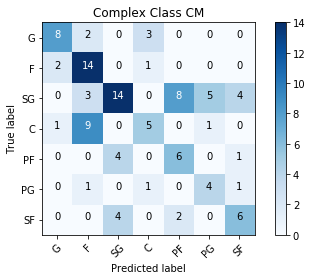

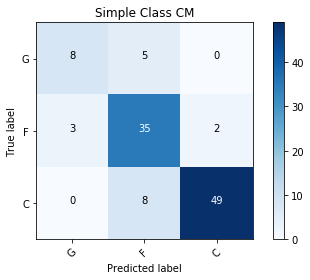

In [48]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
def plot_confusion_matrix(cm, classes,
                          title='x',
                          cmap=plt.cm.Blues):
    
 #   print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnc_matrix = confusion_matrix(X_test["PClass"], y_predpc)
np.set_printoptions(precision=2)

# Compute confusion matrix
cns_matrix = confusion_matrix(X_test["Position"], y_predp)
np.set_printoptions(precision=2)

# Plot 
plt.figure()
plot_confusion_matrix(cns_matrix, classes=pxnames,
                      title='Complex Class CM')


plt.show()

# Plot 
plt.figure()
plot_confusion_matrix(cnc_matrix, classes=pcnames,
                      title='Simple Class CM')


plt.show()



### did we get through that in < 10min

Sensitivity (Recall or True positive rate)
Specificity (True negative rate)
Correlation coefficient and F-score

In [49]:
xtest = X_test["Position"]
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(xtest, y_predp, labels=pxnames)

(array([0.64, 0.48, 0.5 , 0.73, 0.5 , 0.38, 0.4 ]),
 array([0.41, 0.82, 0.5 , 0.62, 0.31, 0.55, 0.57]),
 array([0.5 , 0.61, 0.5 , 0.67, 0.38, 0.44, 0.47]),
 array([34, 17, 12, 13, 16, 11,  7]))